# Convolutional Neural Networks for Image Classification

#### Importing the famous MNIST dataset from keras library

In [43]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() #tuple unpacking and loading mnist data

##  Visualizing the Image Data
Importing librarries for visualisation

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#Checking shape of the training data 
x_train.shape

(60000, 28, 28)

We can see it does not have a color channel

In [46]:
single_image = x_train[0] #grabbing a single image

In [47]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [48]:
single_image.shape

(28, 28)

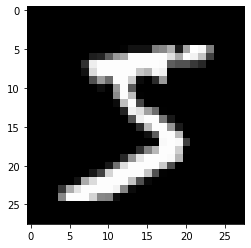

In [49]:
plt.imshow(single_image,cmap='gray') #displaying the image 

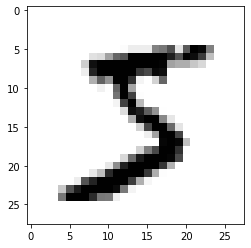

In [50]:
plt.imshow(single_image,cmap='gray_r')

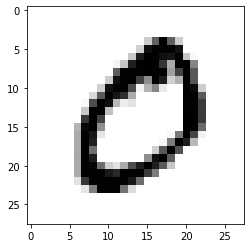

In [51]:
plt.imshow(x_train[1],cmap='gray_r')

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [52]:
y_train #We can see that the values match to values of x_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

It looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis instead of distinct categories. Keras has an easy to use function for this called "to_categorical"

In [54]:
from keras.utils.np_utils import to_categorical

In [55]:
y_train.shape

(60000,)

y_cat_test and y_cat_train are categorical versions of y_train and y_test

In [56]:
y_cat_test = to_categorical(y_test,10) #No of classes is 10(0-9)

In [57]:
y_cat_train = to_categorical(y_train,10)

In [58]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

We can see that it has bee one hot encoded and we can it has value 1 at index position 6

### Processing X Data

We should normalize the X data between 0 and 1 because CNN will work better

In [59]:
single_image.max()

255

In [60]:
single_image.min()

0

In [61]:
x_train = x_train/255 #or x_train/x_train.max() #dividing by MAX value 
x_test = x_test/255 #or x_test/x_test.max()

In [62]:
scaled_single = x_train[0]

In [63]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

scaled_single.max()

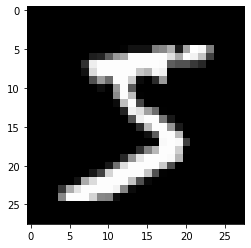

In [64]:
plt.imshow(scaled_single,cmap='gray')

We can see it is the same image as the previous version

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [65]:
x_train.shape

(60000, 28, 28)

In [66]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (1 channel for grayscale images and 3 for RGB images)

In [67]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [68]:
x_train.shape

(60000, 28, 28, 1)

In [69]:
x_test = x_test.reshape(10000,28,28,1)

In [70]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [72]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTENING THE IMAGES(2D --> 1D)
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER and has 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [74]:
model.fit(x_train,y_cat_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1375 - accuracy: 0.9585
Epoch 2/4
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0489 - accuracy: 0.9856
Epoch 3/4
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0352 - accuracy: 0.9896
Epoch 4/4
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0263 - accuracy: 0.9922


## Evaluate the Model

In [75]:
model.metrics_names

['loss', 'accuracy']

In [76]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0407 - accuracy: 0.9872


[0.04068687930703163, 0.9872000217437744]

In [77]:
from sklearn.metrics import classification_report

In [78]:
predictions = model.predict_classes(x_test)

In [79]:
y_cat_test.shape

(10000, 10)

In [80]:
y_cat_test[9999]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [81]:
predictions[9999]

6

Comparing y_test with predictions we can see it is pretty accurate

In [82]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [83]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [84]:
print(classification_report(y_test,predictions)) #printing the classification report with different scores

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Looks like the CNN performed quite well!